# Qubit compilation of photonic circuits.

We show how to map qubit circuits to post-selected linear optical circuits via the ZX calculus.

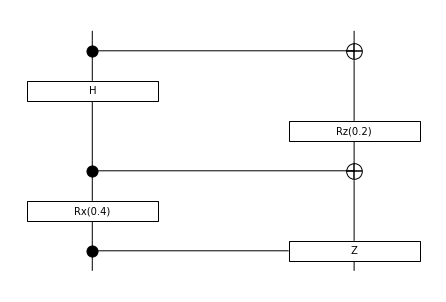

In [1]:
from discopy.quantum import CX, H, Id, Rz, Rx, CZ

circuit = CX >> H @ Rz(0.2) >> CX >> Rx(0.4) @ Id(1) >> CZ
circuit.draw()

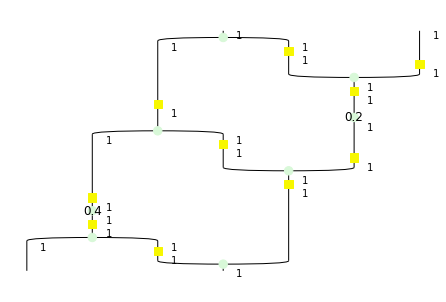

In [2]:
from discopy.quantum.zx import circuit2zx, decomp

diagram = decomp(circuit2zx(circuit))
diagram.draw()

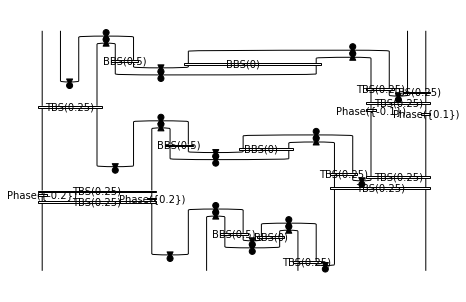

In [3]:
from discopy.quantum.optics import zx2path

circ = zx2path(diagram)
circ.draw(draw_type_labels=False)

In [4]:
def dual_rail_states(n_qubits):
    strings = []
    def genbin(n, bs=[]):
        if len(bs) == 2*n:
            strings.append(bs)
        else:
            genbin(n, bs + [1, 0])
            genbin(n, bs + [0, 1])
    genbin(n_qubits)
    return strings

dual_rail_states(2)

[[1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1]]

In [5]:
from discopy.quantum.optics import evaluate
import numpy as np

states = dual_rail_states(len(circuit.cod))
array = np.array([[evaluate(circ, x, y) for y in states] for x in states])
np.round(array, decimals=3)

array([[ 0.063-0.045j, -0.14 -0.192j, -0.14 -0.192j, -0.063+0.045j],
       [ 0.14 -0.192j,  0.062+0.045j,  0.062+0.045j, -0.14 +0.192j],
       [-0.14 +0.192j,  0.062+0.045j, -0.062-0.045j, -0.14 +0.192j],
       [ 0.062-0.045j,  0.14 +0.192j, -0.14 -0.192j,  0.062-0.045j]])

In [9]:
circuit.eval()

Tensor(dom=Dim(2, 2), cod=Dim(2, 2), array=[0.1767767 -0.12843579j, -0.39528471-0.54406272j, -0.39528471-0.54406272j,
 -0.1767767 +0.12843579j, 0.39528471-0.54406272j, 0.1767767 +0.12843579j,
 0.1767767 +0.12843579j, -0.39528471+0.54406272j, -0.39528471+0.54406272j,
 0.1767767 +0.12843579j, -0.1767767 -0.12843579j, -0.39528471+0.54406272j,
 0.1767767 -0.12843579j, 0.39528471+0.54406272j, -0.39528471-0.54406272j,
 0.1767767 -0.12843579j])

Check that the compiled photonic circuit has the same semantics as the qubit circuit we started with, up to a scalar.

In [7]:
assert np.allclose(2 * np.sqrt(2) * array.flatten(), circuit.eval().array.flatten())